In [1]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv("../data/raw/survey_results.csv")
print(f"Shape for Data Frame {df.shape}")
df.head()

Shape for Data Frame (30010, 17)


,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
4,R00005,23,M,Metro,Student,NaN,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100


In [3]:
df.describe()

,age
count,30010.000000
mean,33.047684
std,13.439250
min,18.000000
25%,23.000000
50%,31.000000
75%,40.000000
max,604.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30010 entries, 0 to 30009
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   respondent_id                   30010 non-null  object
 1   age                             30010 non-null  int64 
 2   gender                          30010 non-null  object
 3   zone                            30010 non-null  object
 4   occupation                      30010 non-null  object
 5   income_levels                   21946 non-null  object
 6   consume_frequency(weekly)       30002 non-null  object
 7   current_brand                   30010 non-null  object
 8   preferable_consumption_size     30010 non-null  object
 9   awareness_of_other_brands       30010 non-null  object
 10  reasons_for_choosing_brands     30010 non-null  object
 11  flavor_preference               30010 non-null  object
 12  purchase_channel                30000 non-null

In [5]:
dupes = df[df.duplicated(subset=["respondent_id"])]
dupes.shape


(10, 17)

In [6]:
dupes

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
2309,R02309,27,M,Urban,Working Professional,16L - 25L,3-4 times,Newcomer,Small (250 ml),2 to 4,Brand Reputation,Traditional,Online,Simple,Medium (Moderately health-conscious),Social (eg. Parties),150-200
2666,R02665,61,M,Metro,Entrepreneur,16L - 25L,3-4 times,Established,Medium (500 ml),above 4,Brand Reputation,Exotic,Retail Store,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",200-250
5151,R05149,21,M,Semi-Urban,Student,NaN,3-4 times,Established,Small (250 ml),2 to 4,Availability,Traditional,Retail Store,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
7794,R07791,25,M,Metro,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
8516,R08512,20,F,Metro,Student,NaN,5-7 times,Established,Large (1 L),0 to 1,Price,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
11317,R11312,18,F,Urban,Student,NaN,0-2 times,Newcomer,Medium (500 ml),2 to 4,Availability,Exotic,Online,Premium,Medium (Moderately health-conscious),Social (eg. Parties),100-150
19050,R19044,57,M,Semi-Urban,Retired,<10L,3-4 times,Newcomer,Large (1 L),2 to 4,Price,Traditional,Retail Store,Premium,High (Very health-conscious),Social (eg. Parties),150-200
22412,R22405,26,M,Metro,Working Professional,16L - 25L,0-2 times,Newcomer,Small (250 ml),0 to 1,Price,Exotic,Online,Premium,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
23406,R23398,27,M,Urban,Working Professional,10L - 15L,5-7 times,Newcomer,Large (1 L),above 4,Availability,Traditional,Online,Premium,High (Very health-conscious),Casual (eg. At home),200-250
25068,R25059,34,F,Urban,Working Professional,16L - 25L,0-2 times,Newcomer,Small (250 ml),2 to 4,Brand Reputation,Exotic,Online,Eco-Friendly,High (Very health-conscious),"Active (eg. Sports, gym)",150-200


In [7]:
df.isna().sum()

respondent_id                        0
age                                  0
gender                               0
zone                                 0
occupation                           0
income_levels                     8064
consume_frequency(weekly)            8
current_brand                        0
preferable_consumption_size          0
awareness_of_other_brands            0
reasons_for_choosing_brands          0
flavor_preference                    0
purchase_channel                    10
packaging_preference                 0
health_concerns                      0
typical_consumption_situations       0
price_range                          0
dtype: int64

#### Respondent_id is not null Let me check duplicate on this column.

In [8]:
duplicate_respondent_Id = df['respondent_id'].duplicated().sum()
type(duplicate_respondent_Id)
duplicate_respondent_Id

np.int64(10)

In [9]:
dupe_ids = df['respondent_id'][df['respondent_id'].duplicated()].unique()
print(dupe_ids)

dupes = df[df['respondent_id'].isin(dupe_ids)].sort_values('respondent_id')
print(dupes)


['R02309' 'R02665' 'R05149' 'R07791' 'R08512' 'R11312' 'R19044' 'R22405'
 'R23398' 'R25059']
      respondent_id  age gender        zone            occupation  \
2308         R02309   27      M       Urban  Working Professional   
2309         R02309   27      M       Urban  Working Professional   
2665         R02665   61      M       Metro          Entrepreneur   
2666         R02665   61      M       Metro          Entrepreneur   
5150         R05149   21      M  Semi-Urban               Student   
5151         R05149   21      M  Semi-Urban               Student   
7793         R07791   25      M       Metro  Working Professional   
7794         R07791   25      M       Metro  Working Professional   
8516         R08512   20      F       Metro               Student   
8515         R08512   20      F       Metro               Student   
11316        R11312   18      F       Urban               Student   
11317        R11312   18      F       Urban               Student   
19049     

In [10]:
df = df.drop_duplicates(subset=['respondent_id'], keep='first')


In [11]:
print(f"Shape of Data Frame after drop duplicates {df.shape}")

Shape of Data Frame after drop duplicates (30000, 17)


#### Outliter Detection on the Age.

In [12]:
df.age.describe()

count    30000.000000
mean        33.048167
std         13.438904
min         18.000000
25%         23.000000
50%         31.000000
75%         40.000000
max        604.000000
Name: age, dtype: float64

In [13]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = max(0,Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")


Lower bound: 0, Upper bound: 65.5


In [14]:
outliers = df[(df['age'] > upper_bound) | (df['age'] < lower_bound )] 
print(outliers['age'].value_counts())


age
67     106
66      99
69      98
70      94
68      87
428      2
453      1
604      1
457      1
267      1
285      1
192      1
203      1
Name: count, dtype: int64


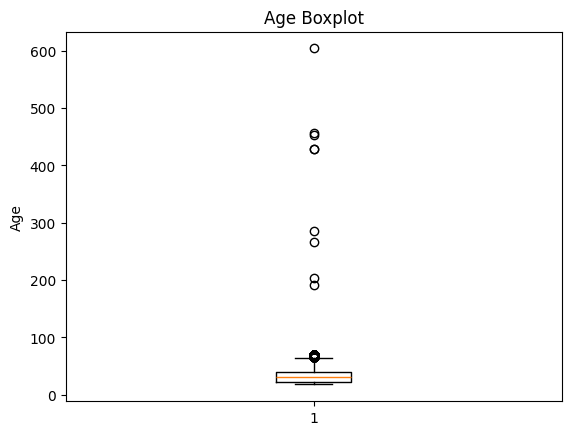

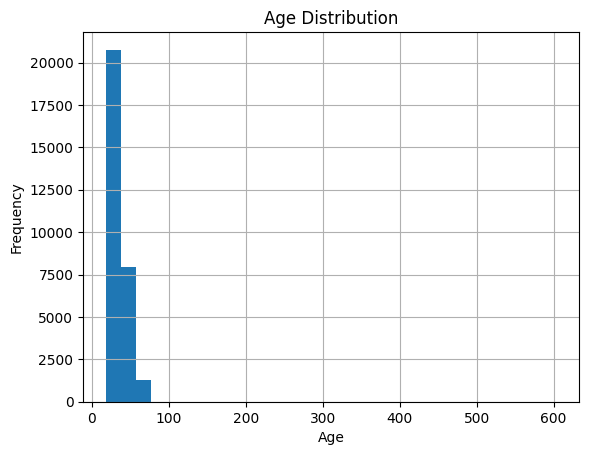

In [15]:
import matplotlib.pyplot as plt

plt.boxplot(df['age'])
plt.title("Age Boxplot")
plt.ylabel("Age")
plt.show()

df['age'].hist(bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [16]:
df.shape

(30000, 17)

In [17]:
df_age_above_70 = df[df['age'] > 70]
df_age_above_70.shape

(9, 17)

In [18]:
df_clean = df[~(df['age'] >70)]
df_clean.shape


(29991, 17)

In [19]:
df_clean.isna().sum()

respondent_id                        0
age                                  0
gender                               0
zone                                 0
occupation                           0
income_levels                     8060
consume_frequency(weekly)            8
current_brand                        0
preferable_consumption_size          0
awareness_of_other_brands            0
reasons_for_choosing_brands          0
flavor_preference                    0
purchase_channel                    10
packaging_preference                 0
health_concerns                      0
typical_consumption_situations       0
price_range                          0
dtype: int64

In [20]:
mode_consume_frequency = df_clean['consume_frequency(weekly)'].mode()[0]
mode_consume_frequency

'3-4 times'

In [21]:
mode_purchase_channel = df_clean['purchase_channel'].mode()[0]
mode_purchase_channel

'Online'

In [ ]:
df_clean['consume_frequency(weekly)']= df_clean['consume_frequency(weekly)'].fillna(mode_consume_frequency)


In [23]:
df_clean.isna().sum()

respondent_id                        0
age                                  0
gender                               0
zone                                 0
occupation                           0
income_levels                     8060
consume_frequency(weekly)            0
current_brand                        0
preferable_consumption_size          0
awareness_of_other_brands            0
reasons_for_choosing_brands          0
flavor_preference                    0
purchase_channel                    10
packaging_preference                 0
health_concerns                      0
typical_consumption_situations       0
price_range                          0
dtype: int64

In [ ]:
df_clean['purchase_channel'] = df_clean['purchase_channel'].fillna(mode_purchase_channel)

In [25]:
df_clean.isna().sum()

respondent_id                        0
age                                  0
gender                               0
zone                                 0
occupation                           0
income_levels                     8060
consume_frequency(weekly)            0
current_brand                        0
preferable_consumption_size          0
awareness_of_other_brands            0
reasons_for_choosing_brands          0
flavor_preference                    0
purchase_channel                     0
packaging_preference                 0
health_concerns                      0
typical_consumption_situations       0
price_range                          0
dtype: int64

In [ ]:
df_clean['income_levels'] = df_clean['income_levels'].fillna('Not Reported')

In [27]:
df_clean.isna().sum()

respondent_id                     0
age                               0
gender                            0
zone                              0
occupation                        0
income_levels                     0
consume_frequency(weekly)         0
current_brand                     0
preferable_consumption_size       0
awareness_of_other_brands         0
reasons_for_choosing_brands       0
flavor_preference                 0
purchase_channel                  0
packaging_preference              0
health_concerns                   0
typical_consumption_situations    0
price_range                       0
dtype: int64

In [28]:
df_clean['zone'].unique()

array(['Urban', 'Metro', 'Rural', 'Semi-Urban', 'Metor', 'urbna'],
      dtype=object)

In [29]:
df_clean['current_brand'].unique()

array(['Newcomer', 'Established', 'newcomer', 'Establishd'], dtype=object)

In [30]:
df_clean['zone'].value_counts()

zone
Metro         11906
Urban         10686
Semi-Urban     5274
Rural          2116
urbna             5
Metor             4
Name: count, dtype: int64

In [31]:
df_clean['current_brand'].value_counts()

current_brand
Established    15442
Newcomer       14499
newcomer          30
Establishd        20
Name: count, dtype: int64

In [ ]:
zone_correction = {
    "Metor":"Metro", "urbna":"Urban"
}
df_clean['zone'] = df_clean['zone'].replace(zone_correction)

In [33]:
df_clean['zone'].unique()

array(['Urban', 'Metro', 'Rural', 'Semi-Urban'], dtype=object)

In [ ]:
current_brand_correction = {
    "newcomer":"Newcomer", "Establishd":"Established"
}
df_clean['current_brand'] = df_clean['current_brand'].replace(current_brand_correction)

In [35]:
df_clean['current_brand'].unique()

array(['Newcomer', 'Established'], dtype=object)

In [ ]:
def assign_age_group(age):

    if 18 <= age <=25 :
        return "18-25"
    elif 26 <= age <= 35 :
        return "26-35"
    elif 36 <= age <=45 :
        return "36-45"
    elif 46 <= age <= 55 :
        return "46-55"
    elif 56 <= age <=70:
        return "56-70"
    else:
        return "70+"

# Apply function
df_clean['age_group'] = df_clean['age'].apply(assign_age_group)

cat_order = ["18-25","26-35","36-45","46-55","56-70","70+"]

df_clean["age_group"] = pd.Categorical(df_clean['age_group'],
                                       categories=cat_order,ordered=True)

In [37]:

df_clean = df_clean.drop(columns=['age'])

In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29991 entries, 0 to 30009
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   respondent_id                   29991 non-null  object  
 1   gender                          29991 non-null  object  
 2   zone                            29991 non-null  object  
 3   occupation                      29991 non-null  object  
 4   income_levels                   29991 non-null  object  
 5   consume_frequency(weekly)       29991 non-null  object  
 6   current_brand                   29991 non-null  object  
 7   preferable_consumption_size     29991 non-null  object  
 8   awareness_of_other_brands       29991 non-null  object  
 9   reasons_for_choosing_brands     29991 non-null  object  
 10  flavor_preference               29991 non-null  object  
 11  purchase_channel                29991 non-null  object  
 12  packaging_preference   

In [39]:
freq_map = {
    "0-2 times":1,
    "3-4 times":2,
    "5-7 times":3
}

aware_map = {
    "0 to 1": 1,
    "2 to 4":2,
    "above 4":3
}

def calculate_cf_ab(row):
    f = freq_map.get(row['consume_frequency(weekly)'], 0)   # default 0 if not found
    a = aware_map.get(row['awareness_of_other_brands'], 0)
    
    if a == 0:   # prevent division by zero
        return None
    
    score = f / (a + f)
    return round(score, 2)


df_clean['cf_ab_score'] = df_clean.apply(calculate_cf_ab, axis=1)

In [40]:
df_clean['cf_ab_score'].describe()

count    29991.000000
mean         0.537350
std          0.141866
min          0.250000
25%          0.500000
50%          0.500000
75%          0.670000
max          0.750000
Name: cf_ab_score, dtype: float64

In [41]:
zone_map = {
    "Urban": 3, "Metro": 4,"Rural": 1,"Semi-Urban": 2
}

income_level_map = {
     "<10L": 1,"10L - 15L": 2,"16L - 25L": 3, "26L - 35L": 4,"> 35L": 5,"Not Reported": 0
}

def calculate_zas_score(row):

    zone_score = zone_map.get(row['zone'],1)
    
    income_score = income_level_map.get(row['income_levels'],1)

    zas_score = zone_score * income_score

    return zas_score

In [42]:
df_clean['zas_score'] = df_clean.apply(calculate_zas_score,axis=1)

In [43]:
# (1) Optional: make key text columns categorical to save memory & speed comparisons
cat_cols = ['current_brand', 'reasons_for_choosing_brands']
for c in cat_cols:
    df_clean[c] = df_clean[c].astype('category')

# (2) Vectorized binary indicator:
# bsi = 1 if current_brand != "Established" AND reason in {"Price","Quality"}
mask = (
    (df_clean['current_brand'] != "Established") &
    (df_clean['reasons_for_choosing_brands'].isin(["Price", "Quality"]))
)
df_clean['bsi'] = mask.astype('int8')   # int8 saves memory vs int64


In [44]:
df_clean['age_group'].value_counts()

age_group
18-25    10468
26-35     9093
36-45     5972
46-55     2966
56-70     1492
70+          0
Name: count, dtype: int64

In [45]:
import pandas as pd

pd.crosstab(df_clean['age_group'], df_clean['occupation'])


occupation,Entrepreneur,Retired,Student,Working Professional
age_group,,,,
18-25,535,0,7328,2605
26-35,1826,0,697,6570
36-45,1619,0,0,4353
46-55,799,0,0,2167
56-70,221,1130,35,106


In [46]:
df_clean = df_clean[~((df_clean['age_group'] == '56-70') & 
                      (df_clean['occupation'] == 'Student'))]


In [47]:
pd.crosstab(df_clean['age_group'], df_clean['occupation'])

occupation,Entrepreneur,Retired,Student,Working Professional
age_group,,,,
18-25,535,0,7328,2605
26-35,1826,0,697,6570
36-45,1619,0,0,4353
46-55,799,0,0,2167
56-70,221,1130,0,106


In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29956 entries, 0 to 30009
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   respondent_id                   29956 non-null  object  
 1   gender                          29956 non-null  object  
 2   zone                            29956 non-null  object  
 3   occupation                      29956 non-null  object  
 4   income_levels                   29956 non-null  object  
 5   consume_frequency(weekly)       29956 non-null  object  
 6   current_brand                   29956 non-null  category
 7   preferable_consumption_size     29956 non-null  object  
 8   awareness_of_other_brands       29956 non-null  object  
 9   reasons_for_choosing_brands     29956 non-null  category
 10  flavor_preference               29956 non-null  object  
 11  purchase_channel                29956 non-null  object  
 12  packaging_preference   

In [49]:
df_clean['cf_ab_score'].describe()

count    29956.000000
mean         0.537360
std          0.141876
min          0.250000
25%          0.500000
50%          0.500000
75%          0.670000
max          0.750000
Name: cf_ab_score, dtype: float64

In [50]:
unique_record = df_clean['zas_score'].unique()
unique_record.size

14

In [51]:
rows = df_clean.shape[0]   # gives row count only
print(rows) 

29956


In [52]:
rows = len(df_clean)
print(rows)


29956


In [53]:
df_bsi_zero = df_clean[df_clean['bsi'] == 0]
df_bsi_zero.shape[0]

20796

In [54]:
df_clean.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
0,R00001,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3,1
1,R00002,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20,0
2,R00003,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5,0
3,R00004,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9,0
4,R00005,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0,0


In [56]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29956 entries, 0 to 30009
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   respondent_id                   29956 non-null  object  
 1   gender                          29956 non-null  object  
 2   zone                            29956 non-null  object  
 3   occupation                      29956 non-null  object  
 4   income_levels                   29956 non-null  object  
 5   consume_frequency(weekly)       29956 non-null  object  
 6   current_brand                   29956 non-null  category
 7   preferable_consumption_size     29956 non-null  object  
 8   awareness_of_other_brands       29956 non-null  object  
 9   reasons_for_choosing_brands     29956 non-null  category
 10  flavor_preference               29956 non-null  object  
 11  purchase_channel                29956 non-null  object  
 12  packaging_preference   

In [ ]:
df_clean.to_csv("../data/survey_cleaned.csv", index=False)